The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new
streaming service. 

They are confident that your analysis will be helpful to you in making decisions about
their service. 

They need your expertise to uncover trends and insights from the Netflix data that will be
beneficial to their new product. 

They are eager to begin this project and will therefore need a timely response.

You are to report on how CS-Streaming can best optimise its services and compete with Netflix.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cleaning and Preprocessing Steps:

Convert Data Types:


In [2]:
netflix_data = pd.read_csv('./data/netflix_titles.csv')

Ensure that the ' date_added' column is in datetime format.

In [4]:
netflix_data.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [8]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8805 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
netflix_data.describe(include='all',)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Ensure that the ' release_year' column is in the correct numeric format.


In [5]:
netflix_data['release_year'].dtype

dtype('int64')

Handle Missing Values:

For numeric columns, fill in missing values with the mean or median.

For categorical columns 'rating', 'duration' and 'country', fill missing values with the mode or a placeholder like "Unknown", “Not Rated”


In [25]:
print(netflix_data['type'].unique())
print(netflix_data['rating'].unique())
print(netflix_data['country'].unique())
print(netflix_data['duration'].unique())
#some of the ratings column contains durations, let's look at cleaning that up

['Movie' 'TV Show']
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'Not Rated' 'TV-Y7-FV']
['United States' 'South Africa' 'Unknown' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada

Move the durations in the ratings column to the duration column and set the rating to 'Not Rated'

In [6]:
#netflix_data.loc[netflix_data['rating'] == '66 min']
#netflix_data.loc[5813,'duration'] = '66 min'
#netflix_data.loc[5813,'rating'] = 'Not Rated'
#print(netflix_data.loc[5813])
#netflix_data.loc[netflix_data['rating'] == '74 min']
#netflix_data.loc[5541,'duration'] = '74 min'
#netflix_data.loc[5541,'rating'] = 'Not Rated'
#print(netflix_data.loc[5541])
netflix_data.loc[netflix_data['rating'] == '84 min']
netflix_data.loc[5794,'duration'] = '84 min'
netflix_data.loc[5794,'rating'] = 'Not Rated'
#print(netflix_data.loc[5541])
print(netflix_data['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' 'Not Rated' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


change NaN and 'NR' and 'UR' values in rating to 'Not Rated'

In [19]:
#df = netflix_data.copy() - used to make sure we don't accidentally destroy the data before we have this right
netflix_data.loc[(netflix_data['rating'] == 'NR') | (netflix_data['rating'].isna()) | (netflix_data['rating'] == 'UR' ),'rating'] = 'Not Rated'
print(netflix_data['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'Not Rated' 'TV-Y7-FV']


Change nan countries to 'Unknown'

In [7]:
netflix_data.loc[(netflix_data['country'].isna()) ,'country'] = 'Unknown'
print(netflix_data['country'].unique())

['United States' 'South Africa' 'Unknown' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United Sta

Split data sets to Movies and TV Shows

In [9]:
print(netflix_data.isna().sum())
netflix_data.loc[(netflix_data['director'].isna()) ,'director'] = 'Unknown'
netflix_data.loc[(netflix_data['cast'].isna()) ,'cast'] = 'Unlisted'
netflix_no_date_known = netflix_data[netflix_data['date_added'].isna()].copy()
netflix_data.dropna(inplace=True)
print(netflix_data.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           2
listed_in          0
description        0
dtype: int64
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [11]:
netflix_no_date_known.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [10]:
netflix_tv = netflix_data[netflix_data['type']=='TV Show'].copy()
netflix_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unlisted,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [12]:

netflix_tv['number_of_seasons'] = netflix_tv['duration'].apply(lambda x: str(x).split(' ')[0]).astype(int)

netflix_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number_of_seasons
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unlisted,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


In [13]:
netflix_tv['date_added'] = pd.to_datetime(netflix_tv['date_added'].apply(lambda x : x.strip())) 
print(netflix_tv.info())
print(netflix_tv['number_of_seasons'].mean())

<class 'pandas.core.frame.DataFrame'>
Index: 2664 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            2664 non-null   object        
 1   type               2664 non-null   object        
 2   title              2664 non-null   object        
 3   director           2664 non-null   object        
 4   cast               2664 non-null   object        
 5   country            2664 non-null   object        
 6   date_added         2664 non-null   datetime64[ns]
 7   release_year       2664 non-null   int64         
 8   rating             2664 non-null   object        
 9   duration           2664 non-null   object        
 10  listed_in          2664 non-null   object        
 11  description        2664 non-null   object        
 12  number_of_seasons  2664 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 291.4+ KB
N

In [24]:
netflix_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number_of_seasons
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unlisted,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


In [14]:
netflix_movies = netflix_data[netflix_data['type']=='Movie'].copy()
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unlisted,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [15]:
netflix_movies['duration_in_mins'] = netflix_movies['duration'].apply(lambda x: str(x).split(' ')[0]).astype(int)


print(netflix_movies['duration_in_mins'].mean())
netflix_movies.head()

99.58234046025788


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_in_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unlisted,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [18]:
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'])
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6127 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6127 non-null   object        
 1   type              6127 non-null   object        
 2   title             6127 non-null   object        
 3   director          6127 non-null   object        
 4   cast              6127 non-null   object        
 5   country           6127 non-null   object        
 6   date_added        6127 non-null   datetime64[ns]
 7   release_year      6127 non-null   int64         
 8   rating            6127 non-null   object        
 9   duration          6127 non-null   object        
 10  listed_in         6127 non-null   object        
 11  description       6127 non-null   object        
 12  duration_in_mins  6127 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 670.1+ KB


Remove Duplicates:
· Check for and remove any duplicate entries.


In [27]:
duplicates_tv = netflix_tv[netflix_tv.duplicated()].copy()
duplicates_tv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number_of_seasons


In [16]:
duplicates_movies = netflix_movies[netflix_movies.duplicated()].copy()
duplicates_movies



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_in_mins


Analysis of Data

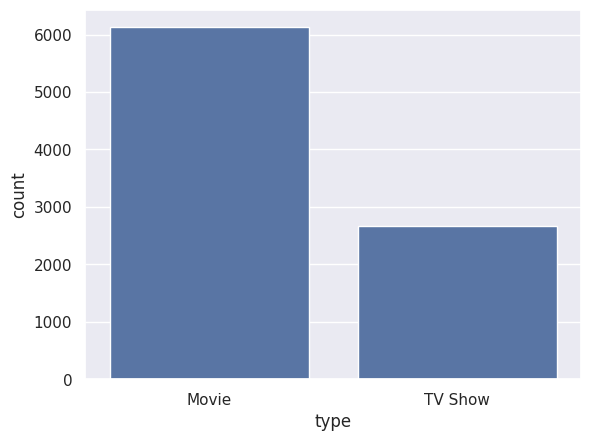

In [26]:
#plot the number of movies vs the number of series
type_plot = sns.countplot(x="type", data=netflix_data)


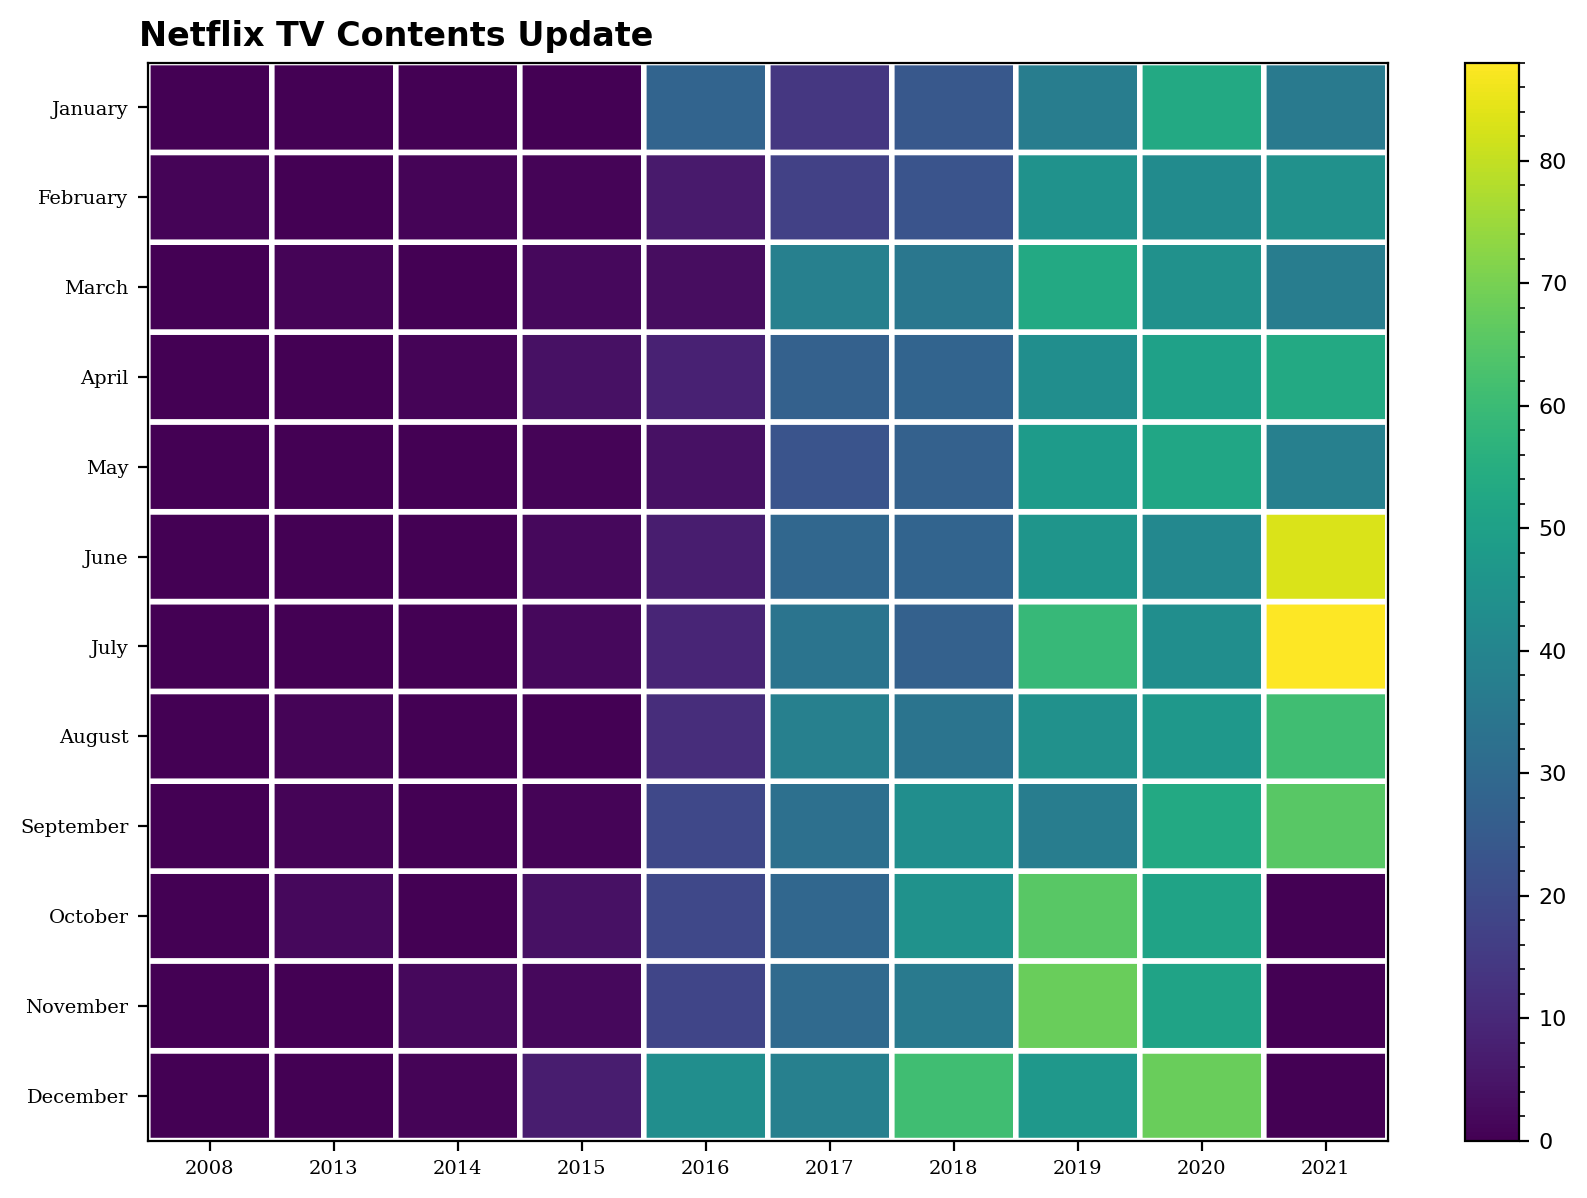

In [17]:
#When are TV shows released?
netflix_date = netflix_tv[['date_added']].copy()
netflix_date['year'] = netflix_tv['date_added'].dt.year
netflix_date['month'] = netflix_tv['date_added'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 7), dpi=200)
#plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.pcolor(df, edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix TV Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

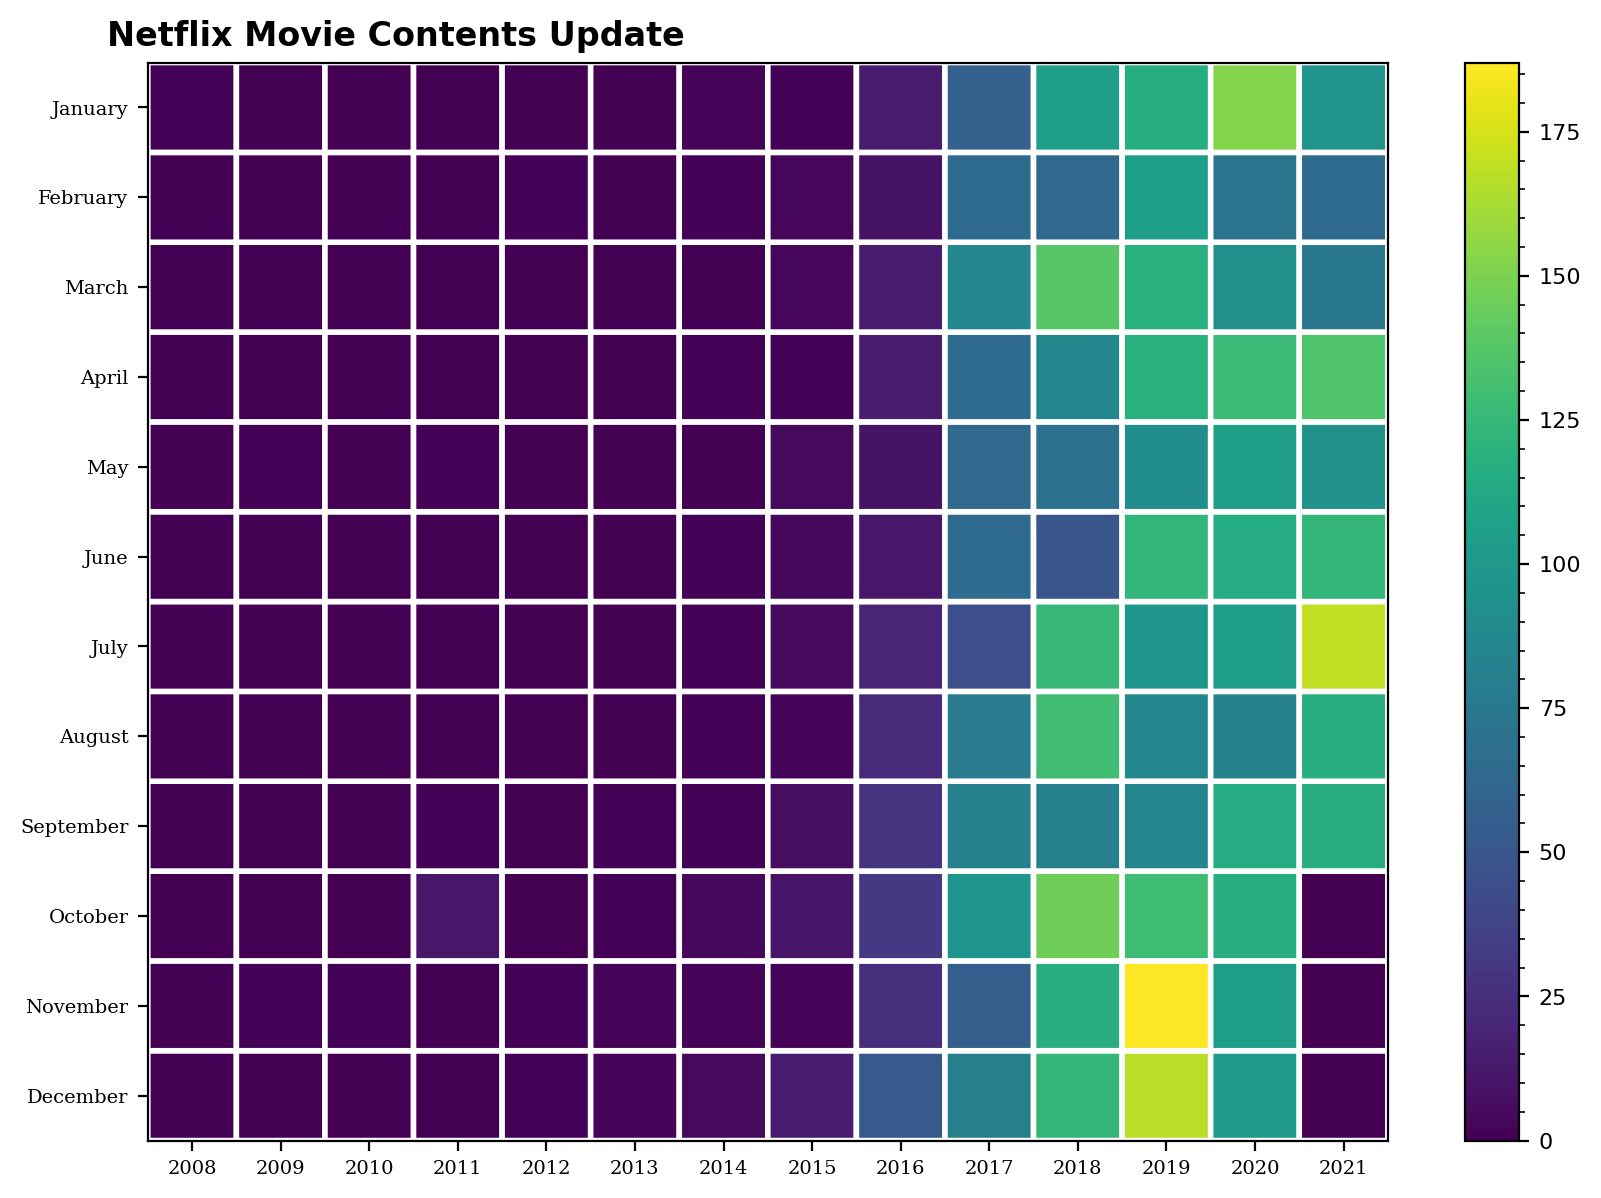

In [20]:
#When are Movies released?
netflix_date = netflix_movies[['date_added']].copy()
netflix_date['year'] = netflix_movies['date_added'].dt.year
netflix_date['month'] = netflix_movies['date_added'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 7), dpi=200)
#plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.pcolor(df, edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Movie Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show();

/tmp/ipykernel_6936/779868373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=netflix_movies, palette='Set2', order=netflix_movies['rating'].value_counts().index[0:15])


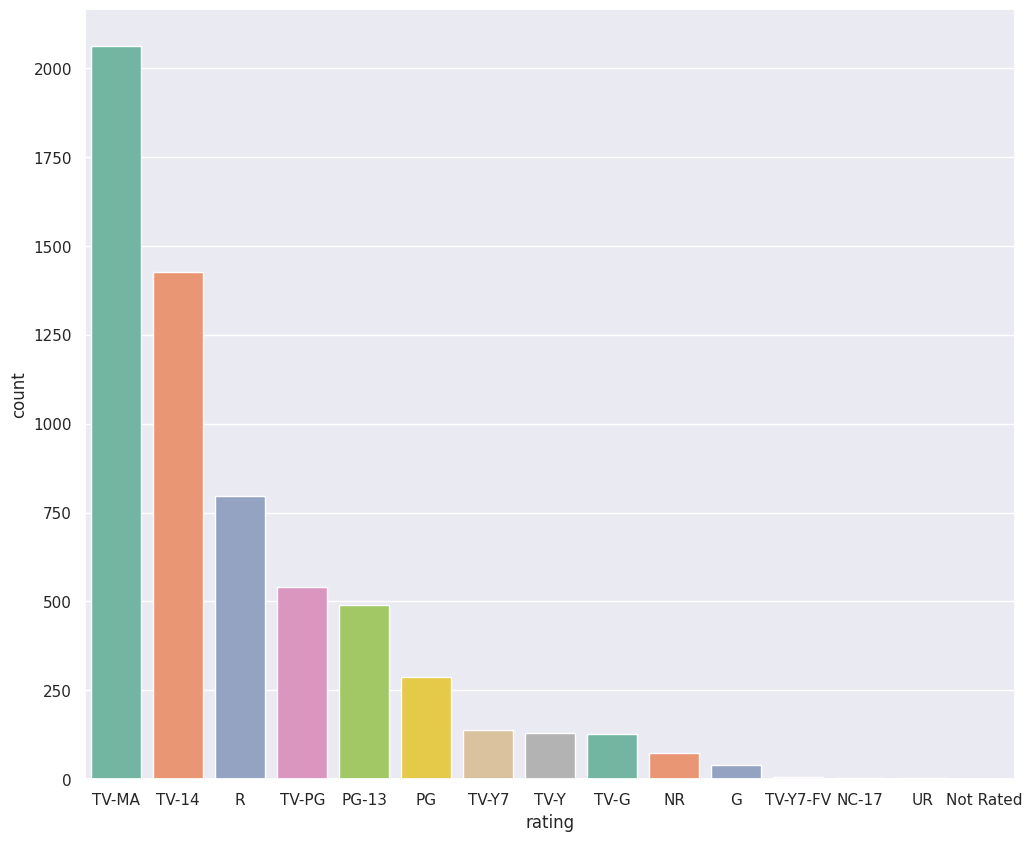

In [22]:
#See the ratings of the movies
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
ax = sns.countplot(x='rating', data=netflix_movies, palette='Set2', order=netflix_movies['rating'].value_counts().index[0:15])

/tmp/ipykernel_6936/1803697268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=netflix_tv, palette='Set2', order=netflix_tv['rating'].value_counts().index[0:15])


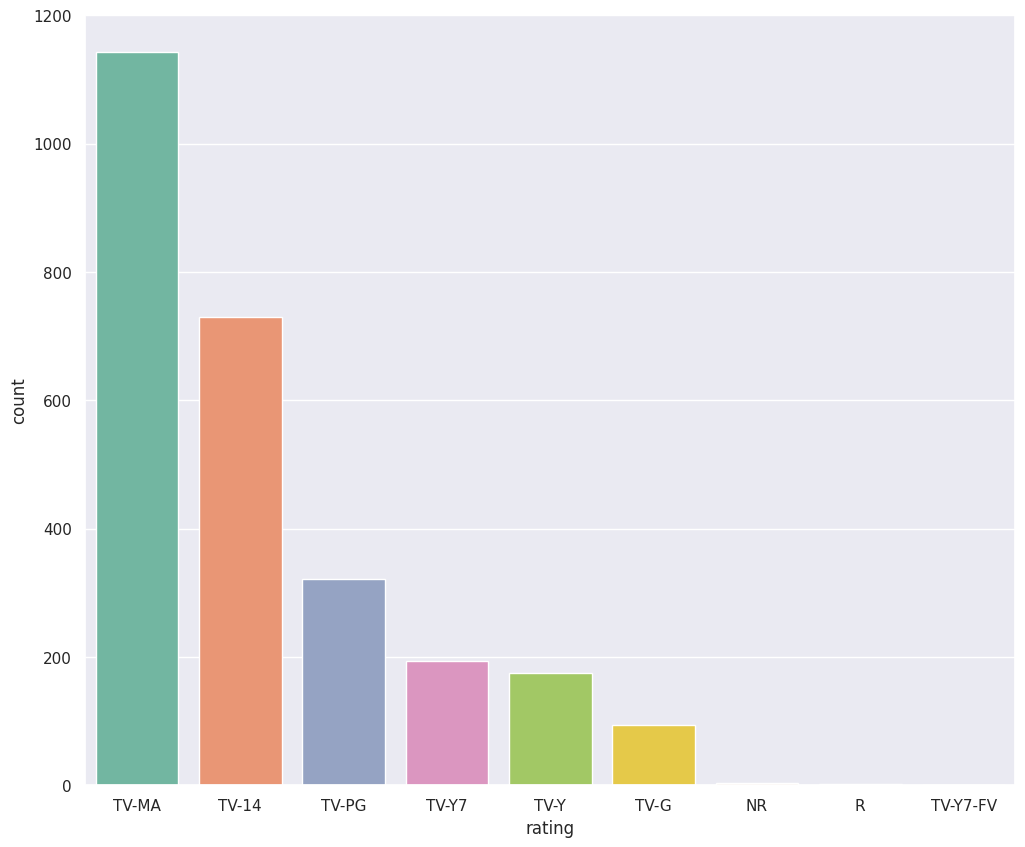

In [23]:
#See the ratings of the tv shows
#See the ratings of the movies
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
ax = sns.countplot(x='rating', data=netflix_tv, palette='Set2', order=netflix_tv['rating'].value_counts().index[0:15])

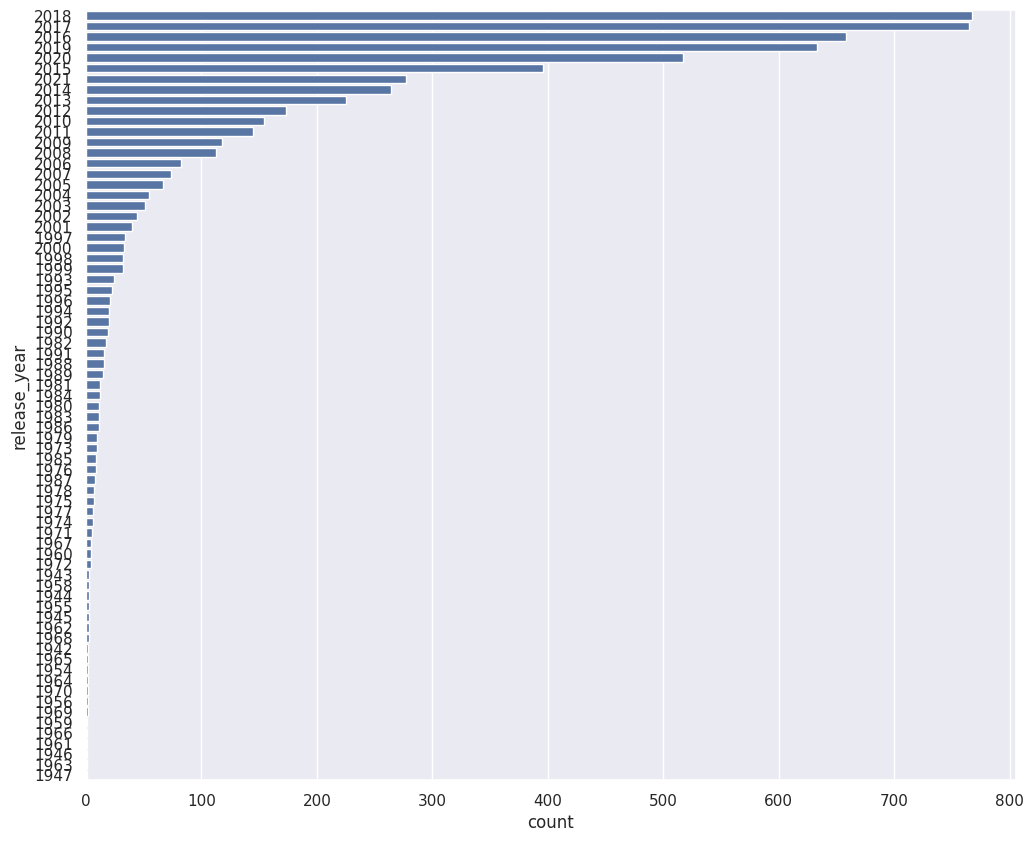

In [38]:
#plot the year of release for movies
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies , order=netflix_movies['release_year'].value_counts().index[0::1])

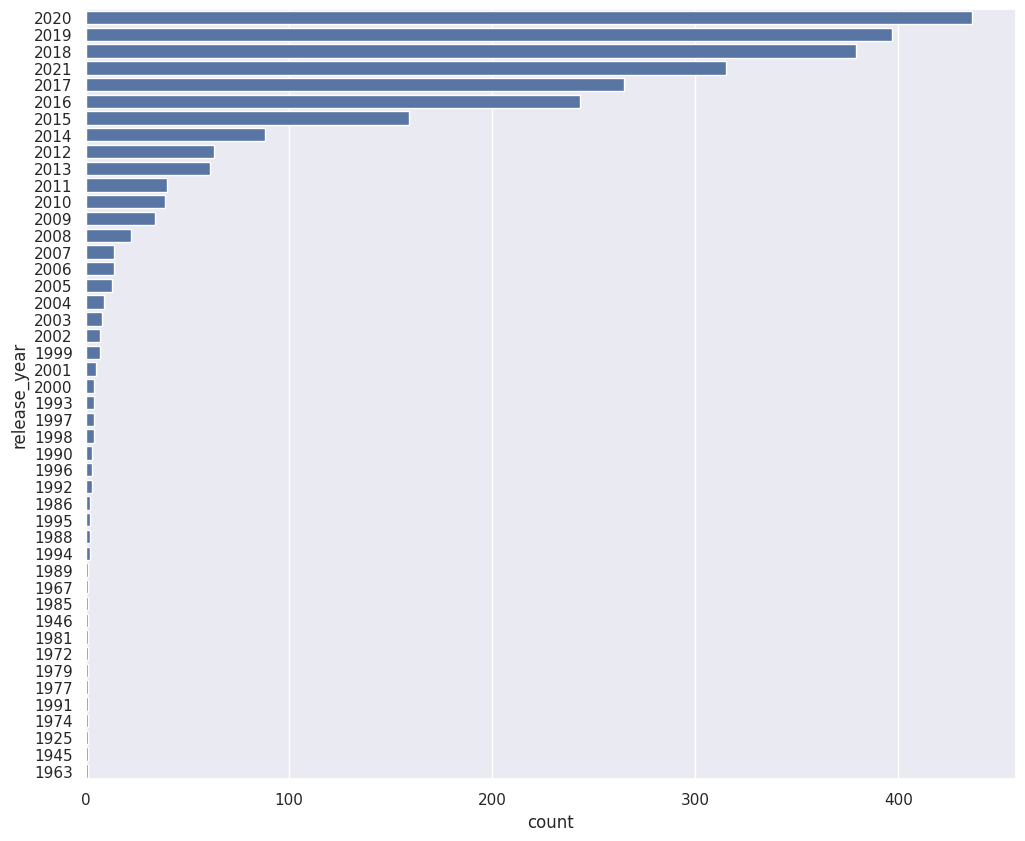

In [37]:
#plot the year of release for tv shows
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
ax = sns.countplot(y="release_year", data=netflix_tv , order=netflix_tv['release_year'].value_counts().index[0::1])

In [44]:
#Movie content by country - split out the different countries into a dictionary and keep a count of the nuber of times they appear
countries={}
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
#countries

{'United States': 1,
 'Unknown': 1,
 ' Ghana': 1,
 ' Burkina Faso': 1,
 ' United Kingdom': 152,
 ' Germany': 104,
 ' Ethiopia': 1,
 'Germany': 3,
 ' Czech Republic': 11,
 'India': 1,
 ' India': 35,
 ' France': 155,
 'China': 1,
 ' Canada': 132,
 ' United States': 388,
 'South Africa': 7,
 ' Japan': 34,
 'Japan': 3,
 'Nigeria': 1,
 'Spain': 1,
 'France': 3,
 'United Kingdom': 1,
 ' Australia': 33,
 ' Mexico': 25,
 ' Italy': 27,
 ' Romania': 4,
 'Australia': 1,
 'Argentina': 2,
 ' Venezuela': 2,
 ' Hong Kong': 24,
 'Canada': 2,
 'Hong Kong': 1,
 ' China': 55,
 'Italy': 1,
 ' Nepal': 2,
 'New Zealand': 2,
 ' Brazil': 10,
 ' Greece': 8,
 'Colombia': 1,
 'Mexico': 1,
 'Belgium': 1,
 'Switzerland': 5,
 'Brazil': 1,
 ' Spain': 42,
 ' Nigeria': 7,
 'Bulgaria': 4,
 '': 6,
 ' Algeria': 3,
 'Poland': 1,
 ' Israel': 7,
 'Saudi Arabia': 1,
 'Thailand': 1,
 'Indonesia': 1,
 'Egypt': 3,
 ' Denmark': 15,
 ' Switzerland': 11,
 'Kuwait': 1,
 ' Netherlands': 19,
 ' Singapore': 8,
 'Malaysia': 1,
 'South 

In [47]:
#clean up the dictionary to remove leading and trailing white spaces - (could go back and do this in the dataset)
countries_fin={}
for country,no in countries.items():
    country=country.strip()
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no

#sort the countries into descending order of content        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}
#countries_fin

{'United States': 389,
 'France': 158,
 'United Kingdom': 153,
 'Canada': 134,
 'Germany': 107,
 'Belgium': 70,
 'China': 56,
 'Spain': 43,
 'Japan': 37,
 'India': 36,
 'Australia': 34,
 'Italy': 28,
 'Mexico': 26,
 'Hong Kong': 25,
 'Sweden': 24,
 'South Africa': 23,
 'Netherlands': 22,
 'United Arab Emirates': 19,
 'Argentina': 17,
 'Denmark': 17,
 'Czech Republic': 16,
 'Switzerland': 16,
 'South Korea': 15,
 'New Zealand': 12,
 'Singapore': 12,
 'Brazil': 11,
 'Poland': 11,
 'Ireland': 11,
 'Norway': 11,
 'Qatar': 10,
 'Luxembourg': 10,
 'Greece': 9,
 'Bulgaria': 9,
 'Russia': 9,
 'Nigeria': 8,
 'Israel': 8,
 'Lebanon': 8,
 'Egypt': 7,
 'Chile': 7,
 'Uruguay': 7,
 'Serbia': 7,
 'Jordan': 7,
 'Finland': 7,
 'Colombia': 6,
 '': 6,
 'Thailand': 6,
 'Hungary': 6,
 'Taiwan': 6,
 'Cambodia': 6,
 'Portugal': 6,
 'Iceland': 6,
 'Peru': 6,
 'Morocco': 6,
 'Romania': 5,
 'Austria': 5,
 'Venezuela': 4,
 'Indonesia': 4,
 'Philippines': 4,
 'Kenya': 4,
 'Iran': 4,
 'Ghana': 3,
 'Algeria': 3,
 '

/tmp/ipykernel_6936/860207199.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(countries_fin.keys())[0:20],rotation = 90)


[Text(0, 0, 'United States'),
 Text(1, 0, 'France'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India'),
 Text(10, 0, 'Australia'),
 Text(11, 0, 'Italy'),
 Text(12, 0, 'Mexico'),
 Text(13, 0, 'Hong Kong'),
 Text(14, 0, 'Sweden'),
 Text(15, 0, 'South Africa'),
 Text(16, 0, 'Netherlands'),
 Text(17, 0, 'United Arab Emirates'),
 Text(18, 0, 'Argentina'),
 Text(19, 0, 'Denmark')]

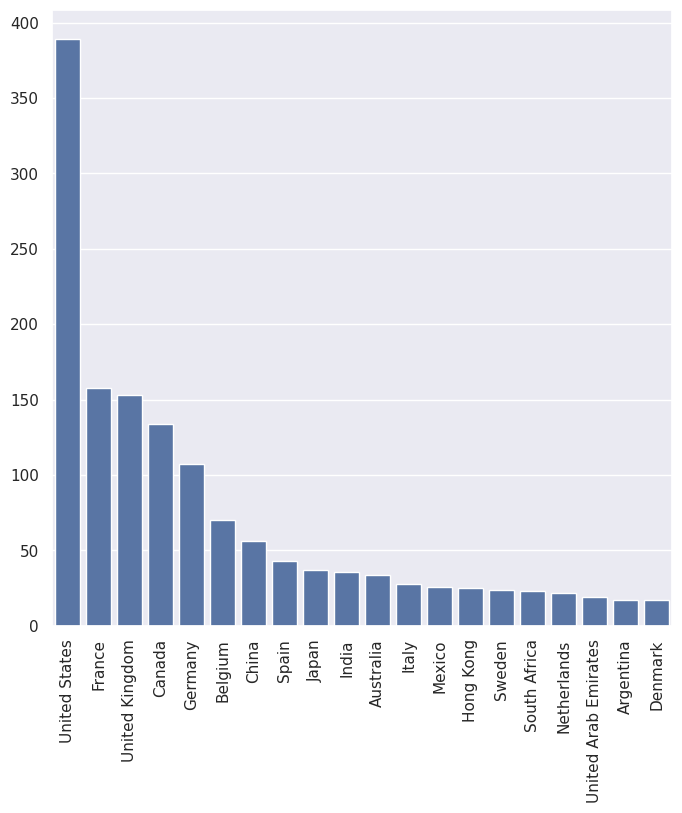

In [46]:
#plot the top 20 of countries with the most movie content
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:20],y=list(countries_fin.values())[0:20])
ax.set_xticklabels(list(countries_fin.keys())[0:20],rotation = 90)

In [56]:
#TV Show content by country - split out the different countries into a dictionary and keep a count of the nuber of times they appear
tv_countries={}
tv_cou=list(netflix_tv['country'])
for i in tv_cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(tv_countries.keys()):
            tv_countries[i]+=1
        else:
            tv_countries[i[0]]=1
    else:
        for j in i:
            if j in list(tv_countries.keys()):
                tv_countries[j]+=1
            else:
                tv_countries[j]=1
tv_countries

{'South Africa': 1,
 'Unknown': 1,
 'India': 1,
 'United Kingdom': 1,
 'United States': 2,
 'Mexico': 1,
 'Turkey': 1,
 'Australia': 1,
 'Finland': 3,
 'Nigeria': 1,
 'Japan': 2,
 'Belgium': 1,
 ' United Kingdom': 26,
 'France': 1,
 ' United States': 91,
 'South Korea': 1,
 'Spain': 1,
 ' Singapore': 5,
 'Russia': 1,
 '': 1,
 ' South Korea': 6,
 'Ireland': 3,
 'Italy': 2,
 'Argentina': 1,
 'Jordan': 1,
 'Colombia': 3,
 'Israel': 1,
 'Taiwan': 1,
 'Germany': 2,
 ' Canada': 42,
 'Canada': 1,
 ' Japan': 25,
 'Poland': 1,
 ' Belgium': 3,
 'Thailand': 1,
 ' New Zealand': 6,
 ' Germany': 19,
 ' Netherlands': 3,
 'Sweden': 1,
 'China': 1,
 'Iceland': 1,
 'Denmark': 1,
 'Philippines': 1,
 ' Indonesia': 2,
 'United Arab Emirates': 1,
 'Norway': 1,
 ' Denmark': 3,
 ' Czech Republic': 5,
 'Lebanon': 1,
 ' France': 26,
 ' India': 3,
 ' Brazil': 3,
 ' Spain': 9,
 'Uruguay': 1,
 ' Mexico': 10,
 'Egypt': 1,
 ' Australia': 10,
 ' Colombia': 7,
 'Luxembourg': 1,
 'Brazil': 1,
 'Senegal': 1,
 ' Finland'

In [62]:
#clean up the dictionary to remove leading and trailing white spaces - (could go back and do this in the dataset)
tv_countries_fin={}
for tv_country,tv_no in tv_countries.items():
    tv_country=tv_country.strip()
    if tv_country in list(tv_countries_fin.keys()):
        tv_countries_fin[tv_country]+=tv_no
    else:
        tv_countries_fin[tv_country]=tv_no
#sort the countries into descending order of content        
tv_countries_fin={k: v for k, v in sorted(tv_countries_fin.items(), key=lambda item: item[1], reverse= True)}
tv_countries_fin

{'United States': 93,
 'Canada': 43,
 'United Kingdom': 27,
 'Japan': 27,
 'France': 27,
 'Germany': 21,
 'Mexico': 11,
 'Australia': 11,
 'Ireland': 11,
 'Spain': 10,
 'Colombia': 10,
 'Italy': 8,
 'China': 8,
 'South Korea': 7,
 'New Zealand': 7,
 'South Africa': 6,
 'Singapore': 6,
 'Czech Republic': 6,
 'India': 4,
 'Finland': 4,
 'Belgium': 4,
 'Netherlands': 4,
 'Sweden': 4,
 'Denmark': 4,
 'Brazil': 4,
 'Russia': 3,
 'Indonesia': 3,
 'Hong Kong': 3,
 'Israel': 2,
 'Poland': 2,
 'Lebanon': 2,
 'Egypt': 2,
 'Luxembourg': 2,
 'Saudi Arabia': 2,
 'Kuwait': 2,
 'Chile': 2,
 'Malaysia': 2,
 'West Germany': 2,
 'Greece': 2,
 'Unknown': 1,
 'Turkey': 1,
 'Nigeria': 1,
 '': 1,
 'Argentina': 1,
 'Jordan': 1,
 'Taiwan': 1,
 'Thailand': 1,
 'Iceland': 1,
 'Philippines': 1,
 'United Arab Emirates': 1,
 'Norway': 1,
 'Uruguay': 1,
 'Senegal': 1,
 'Belarus': 1,
 'Malta': 1,
 'Puerto Rico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Mauritius': 1,
 'Croatia': 1,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 

/tmp/ipykernel_6936/2369655627.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(tv_countries_fin.keys())[0:20],rotation = 90)


[Text(0, 0, 'United States'),
 Text(1, 0, 'Canada'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Mexico'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Ireland'),
 Text(9, 0, 'Spain'),
 Text(10, 0, 'Colombia'),
 Text(11, 0, 'Italy'),
 Text(12, 0, 'China'),
 Text(13, 0, 'South Korea'),
 Text(14, 0, 'New Zealand'),
 Text(15, 0, 'South Africa'),
 Text(16, 0, 'Singapore'),
 Text(17, 0, 'Czech Republic'),
 Text(18, 0, 'India'),
 Text(19, 0, 'Finland')]

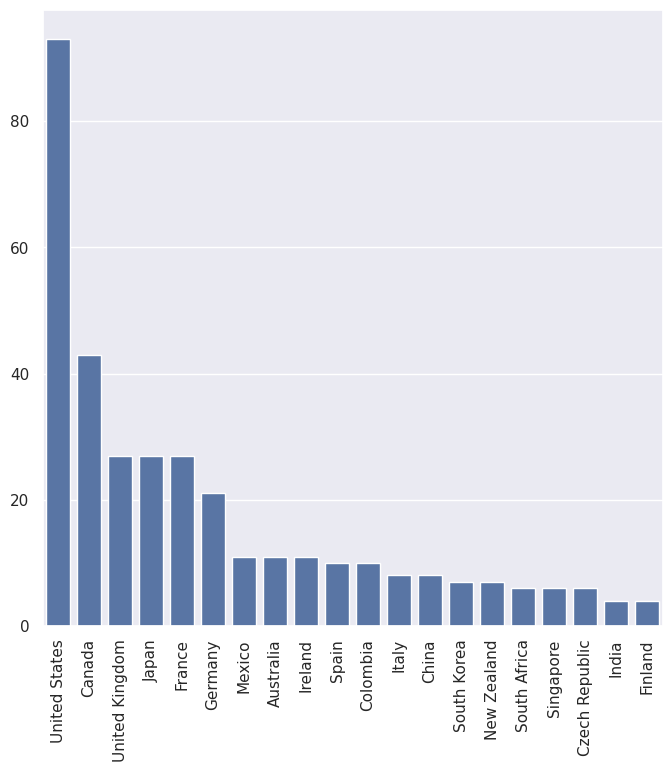

In [63]:
#plot the top 20 of countries with the most movie content
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(tv_countries_fin.keys())[0:20],y=list(tv_countries_fin.values())[0:20])
ax.set_xticklabels(list(tv_countries_fin.keys())[0:20],rotation = 90)

<Axes: xlabel='duration_in_mins', ylabel='Density'>

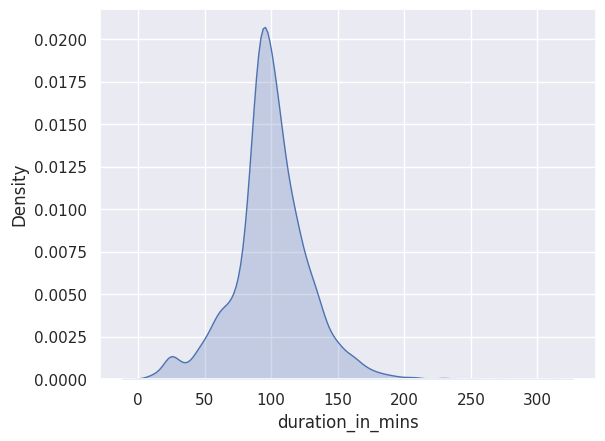

In [69]:
#analyse the duration of movies
sns.set_style("darkgrid")
sns.kdeplot(data=netflix_movies['duration_in_mins'], fill=True)

<Axes: xlabel='number_of_seasons', ylabel='Count'>

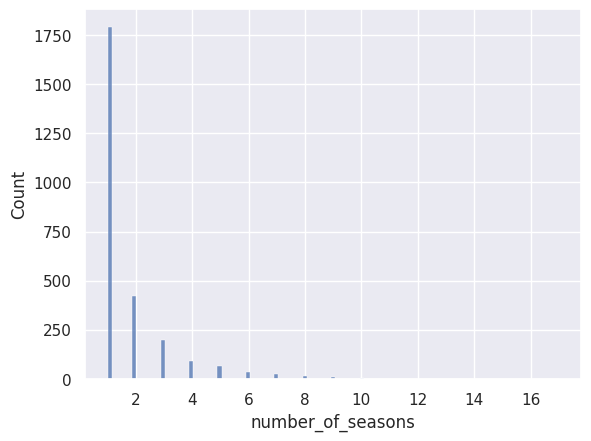

In [74]:
#analyse the number of seasons of tv shows
sns.set_style("darkgrid")
sns.histplot(data=netflix_tv['number_of_seasons'], fill=True)

/tmp/ipykernel_6936/4182249948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='director', data=netflix_movies, palette='Set2', order=netflix_movies['director'].value_counts().index[0:20])
/tmp/ipykernel_6936/4182249948.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(netflix_movies['director'].value_counts().index[0:20],rotation = 90)


[Text(0, 0, 'Unknown'),
 Text(1, 0, 'Rajiv Chilaka'),
 Text(2, 0, 'Raúl Campos, Jan Suter'),
 Text(3, 0, 'Suhas Kadav'),
 Text(4, 0, 'Marcus Raboy'),
 Text(5, 0, 'Jay Karas'),
 Text(6, 0, 'Cathy Garcia-Molina'),
 Text(7, 0, 'Martin Scorsese'),
 Text(8, 0, 'Jay Chapman'),
 Text(9, 0, 'Youssef Chahine'),
 Text(10, 0, 'Steven Spielberg'),
 Text(11, 0, 'Don Michael Paul'),
 Text(12, 0, 'David Dhawan'),
 Text(13, 0, 'Kunle Afolayan'),
 Text(14, 0, 'Yılmaz Erdoğan'),
 Text(15, 0, 'Shannon Hartman'),
 Text(16, 0, 'Robert Rodriguez'),
 Text(17, 0, 'Hakan Algül'),
 Text(18, 0, 'Troy Miller'),
 Text(19, 0, 'Lance Bangs')]

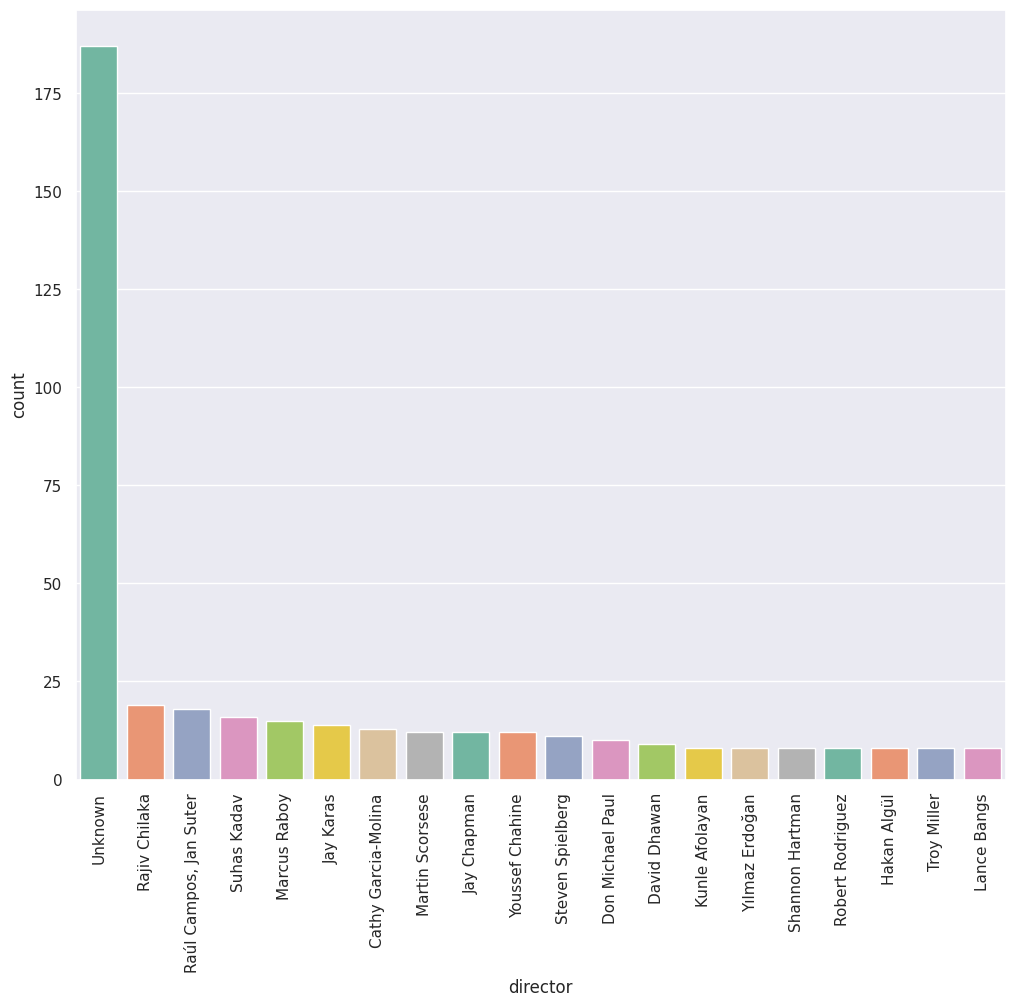

In [78]:
#plot the top 20 directors for movies
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
ax = sns.countplot(x='director', data=netflix_movies, palette='Set2', order=netflix_movies['director'].value_counts().index[0:20])
ax.set_xticklabels(netflix_movies['director'].value_counts().index[0:20],rotation = 90)

/tmp/ipykernel_6936/868425979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='director', data=netflix_tv, palette='Set2', order=netflix_tv['director'].value_counts().index[0:20])
/tmp/ipykernel_6936/868425979.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(netflix_tv['director'].value_counts().index[0:20],rotation = 90)


[Text(0, 0, 'Unknown'),
 Text(1, 0, 'Alastair Fothergill'),
 Text(2, 0, 'Hsu Fu-chun'),
 Text(3, 0, 'Iginio Straffi'),
 Text(4, 0, 'Shin Won-ho'),
 Text(5, 0, 'Rob Seidenglanz'),
 Text(6, 0, 'Ken Burns'),
 Text(7, 0, 'Stan Lathan'),
 Text(8, 0, 'Quek Shio-chuan'),
 Text(9, 0, 'Peter Ho'),
 Text(10, 0, 'Diego Enrique Osorno'),
 Text(11, 0, 'Felipe Cano'),
 Text(12, 0, 'Quentin Tarantino'),
 Text(13, 0, 'Lee Kyoungmi, Yim Pilsung, Jeon Go-woon, Kim Jong-kwan'),
 Text(14, 0, 'Lars Kaalund'),
 Text(15, 0, 'Seren Yüce'),
 Text(16, 0, 'Noam Murro'),
 Text(17, 0, 'Joel Gallen, Tig Notaro'),
 Text(18, 0, 'Mat King'),
 Text(19, 0, 'Padraic McKinley')]

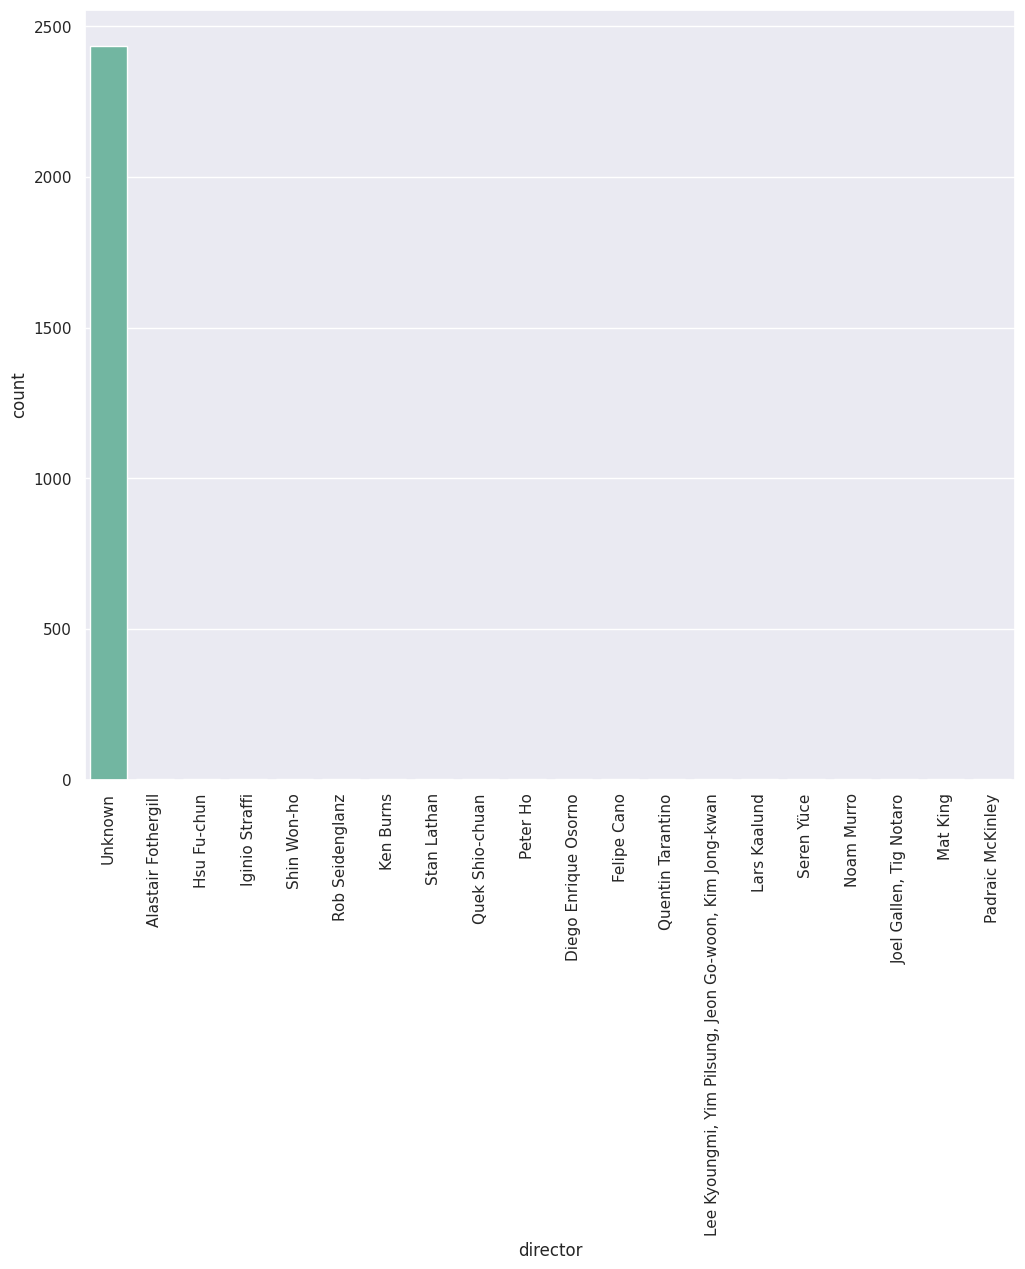

In [79]:
#plot the top 20 directors for tv shows
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
ax = sns.countplot(x='director', data=netflix_tv, palette='Set2', order=netflix_tv['director'].value_counts().index[0:20])
ax.set_xticklabels(netflix_tv['director'].value_counts().index[0:20],rotation = 90)

/tmp/ipykernel_6936/1018574989.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(movie_genres_fin.keys())[0:20],rotation = 90)


[Text(0, 0, 'International Movies'),
 Text(1, 0, 'Dramas'),
 Text(2, 0, 'Independent Movies'),
 Text(3, 0, 'Romantic Movies'),
 Text(4, 0, 'Thrillers'),
 Text(5, 0, 'Comedies'),
 Text(6, 0, 'Music & Musicals'),
 Text(7, 0, 'Sci-Fi & Fantasy'),
 Text(8, 0, 'Sports Movies'),
 Text(9, 0, 'Classic Movies'),
 Text(10, 0, 'LGBTQ Movies'),
 Text(11, 0, 'Horror Movies'),
 Text(12, 0, 'Cult Movies'),
 Text(13, 0, 'Faith & Spirituality'),
 Text(14, 0, 'Anime Features'),
 Text(15, 0, 'Documentaries'),
 Text(16, 0, 'Children & Family Movies'),
 Text(17, 0, 'Stand-Up Comedy'),
 Text(18, 0, 'Action & Adventure'),
 Text(19, 0, 'Movies')]

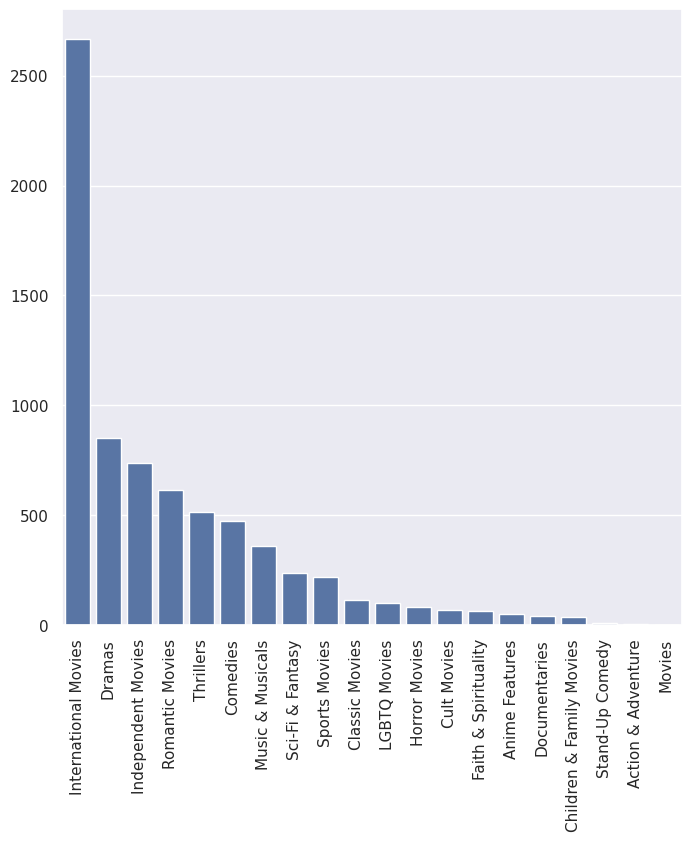

In [81]:
#Movie content by genre - split out the different genres into a dictionary and keep a count of the nuber of times they appear
movie_genres={}
movie_genre=list(netflix_movies['listed_in'])
for i in movie_genre:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(movie_genres.keys()):
            movie_genres[i]+=1
        else:
            movie_genres[i[0]]=1
    else:
        for j in i:
            if j in list(movie_genres.keys()):
                movie_genres[j]+=1
            else:
                movie_genres[j]=1
#countries
movie_genres_fin={}
for genre,no in movie_genres.items():
    genre=genre.strip()
    if genre in list(movie_genres_fin.keys()):
        movie_genres_fin[genre]+=no
    else:
        movie_genres_fin[genre]=no

#sort the countries into descending order of content        
movie_genres_fin={k: v for k, v in sorted(movie_genres_fin.items(), key=lambda item: item[1], reverse= True)}

#plot the top 20 of countries with the most movie content
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(movie_genres_fin.keys())[0:20],y=list(movie_genres_fin.values())[0:20])
ax.set_xticklabels(list(movie_genres_fin.keys())[0:20],rotation = 90)

/tmp/ipykernel_6936/1852334170.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(tv_genres_fin.keys())[0:20],rotation = 90)


[Text(0, 0, 'TV Dramas'),
 Text(1, 0, 'International TV Shows'),
 Text(2, 0, 'Crime TV Shows'),
 Text(3, 0, 'TV Comedies'),
 Text(4, 0, 'Romantic TV Shows'),
 Text(5, 0, 'British TV Shows'),
 Text(6, 0, 'Docuseries'),
 Text(7, 0, 'Spanish-Language TV Shows'),
 Text(8, 0, 'Korean TV Shows'),
 Text(9, 0, 'TV Action & Adventure'),
 Text(10, 0, 'Reality TV'),
 Text(11, 0, 'TV Mysteries'),
 Text(12, 0, 'Science & Nature TV'),
 Text(13, 0, 'TV Sci-Fi & Fantasy'),
 Text(14, 0, 'TV Horror'),
 Text(15, 0, 'Teen TV Shows'),
 Text(16, 0, "Kids' TV"),
 Text(17, 0, 'TV Thrillers'),
 Text(18, 0, 'Classic & Cult TV'),
 Text(19, 0, 'Stand-Up Comedy & Talk Shows')]

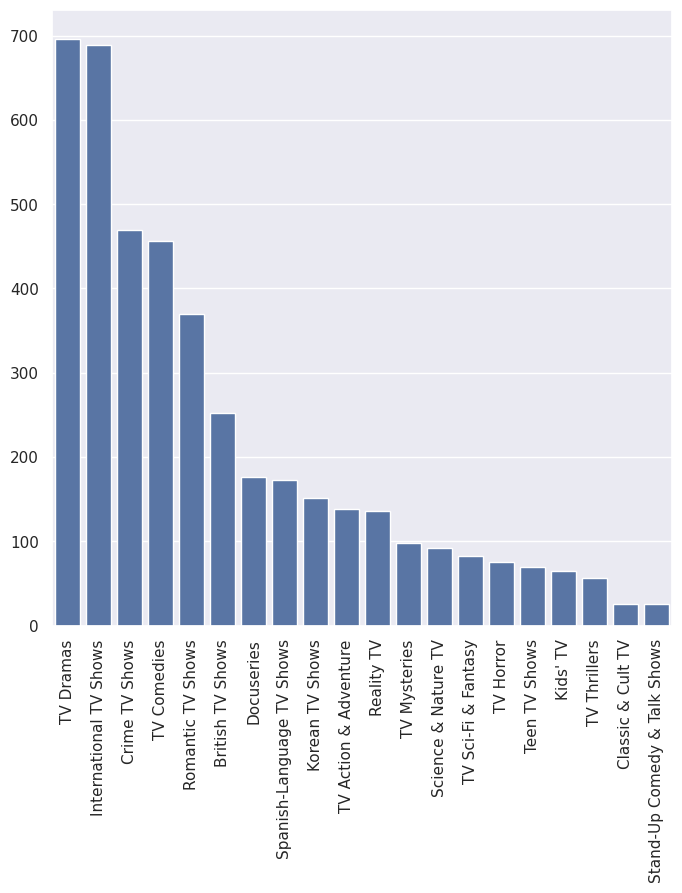

In [84]:
#Movie content by genre - split out the different genres into a dictionary and keep a count of the nuber of times they appear
tv_genres={}
tv_genre=list(netflix_tv['listed_in'])
for i in tv_genre:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(tv_genres.keys()):
            tv_genres[i]+=1
        else:
            tv_genres[i[0]]=1
    else:
        for j in i:
            if j in list(tv_genres.keys()):
                tv_genres[j]+=1
            else:
                tv_genres[j]=1

tv_genres_fin={}
for tv_gen,tvg_no in tv_genres.items():
    tv_gen=tv_gen.strip()
    if tv_gen in list(tv_genres_fin.keys()):
        tv_genres_fin[tv_gen]+=tvg_no
    else:
        tv_genres_fin[tv_gen]=tvg_no

#sort the countries into descending order of content        
tv_genres_fin={k: v for k, v in sorted(tv_genres_fin.items(), key=lambda item: item[1], reverse= True)}

#plot the top 20 of countries with the most movie content
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(tv_genres_fin.keys())[0:20],y=list(tv_genres_fin.values())[0:20])
ax.set_xticklabels(list(tv_genres_fin.keys())[0:20],rotation = 90)

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

Counter({'Unlisted': 475, 'Anupam_Kher': 42, 'Shah_Rukh_Khan': 35, 'Naseeruddin_Shah': 32, 'Akshay_Kumar': 30, 'Om_Puri': 30, 'Amitabh_Bachchan': 28, 'Julie_Tejwani': 28, 'Paresh_Rawal': 28, 'Rupa_Bhimani': 27, 'Boman_Irani': 27, 'Kareena_Kapoor': 25, 'Samuel_L._Jackson': 22, 'Ajay_Devgn': 21, 'Rajesh_Kava': 21, 'Adam_Sandler': 20, 'Nicolas_Cage': 20, 'Nawazuddin_Siddiqui': 20, 'Salman_Khan': 20, 'Kay_Kay_Menon': 20, 'James_Franco': 19, 'John_Cleese': 19, 'Jigna_Bhardwaj': 19, 'Gulshan_Grover': 19, 'Yashpal_Sharma': 18, 'Anil_Kapoor': 18, 'David_Spade': 17, 'Fred_Tatasciore': 17, 'Bruce_Willis': 17, 'Rajpal_Yadav': 17, 'Andrea_Libman': 17, 'Asrani': 17, 'Jackie_Shroff': 17, 'Tinnu_Anand': 16, 'Morgan_Freeman': 16, 'Sanjay_Mishra': 16, 'Manoj_Joshi': 16, 'Rajesh_Sharma': 16, 'Vijay_Raaz': 16, 'Vatsal_Dubey': 16, 'Kristen_Stewart': 16, 'Danny_Trejo': 16, 'Aamir_Khan': 16, 'Priyanka_Chopra': 16, 'Hassan_Hosny': 16, 'Amrish_Puri': 16, 'Saif_Ali_Khan': 16, 'Maya_Rudolph': 15, 'Blossom_Chukw

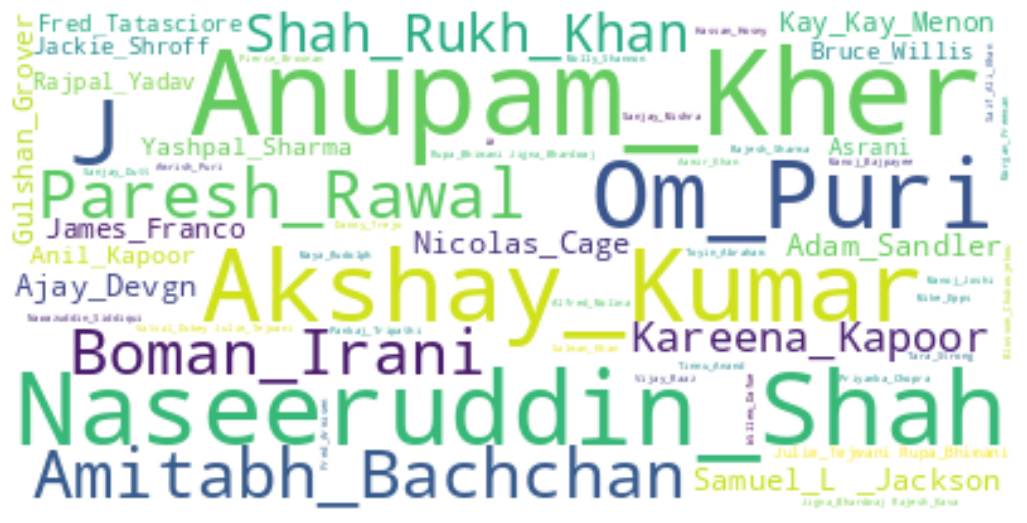

In [110]:
#cloud of the most common movie cast members
cast_list=list(netflix_movies['cast'])
actor=[]

for i in cast_list:
    i=list(i.split(','))
    for j in i:
        actor.append(j.strip().replace(' ','_'))
g=Counter(actor)

print(g)


text = str(actor).replace(',','').replace("'","") #list(set(actor))
plt.rcParams['figure.figsize'] = (13, 13)

wordcloud = WordCloud(stopwords = ["Unlisted"],collocations = True, max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


Counter({'Unlisted': 350, 'Takahiro_Sakurai': 25, 'Yuki_Kaji': 19, 'Junichi_Suwabe': 17, 'Daisuke_Ono': 17, 'Yuichi_Nakamura': 16, 'Ai_Kayano': 16, 'Jun_Fukuyama': 15, 'Yoshimasa_Hosoya': 15, 'David_Attenborough': 14, 'Yoshitsugu_Matsuoka': 13, 'Mamoru_Miyano': 13, 'Hiroshi_Kamiya': 13, 'Takehito_Koyasu': 13, 'Kana_Hanazawa': 13, 'Vincent_Tong': 13, 'Kenjiro_Tsuda': 12, 'Nobuhiko_Okamoto': 12, 'Natsuki_Hanae': 12, 'Ryohei_Kimura': 11, 'Yoko_Hikasa': 11, 'Miyuki_Sawashiro': 11, 'Ashleigh_Ball': 11, 'Tomokazu_Sugita': 11, 'Tay_Ping_Hui': 11, 'Grey_Griffin': 10, 'Rie_Kugimiya': 10, 'Sayaka_Ohara': 10, 'Kaito_Ishikawa': 10, 'Katsuyuki_Konishi': 10, 'Daisuke_Namikawa': 10, 'Johnny_Yong_Bosch': 10, 'Kohsuke_Toriumi': 9, 'Hiroki_Yasumoto': 9, 'Satoshi_Hino': 9, 'Koji_Yusa': 9, 'Kari_Wahlgren': 9, 'Michela_Luci': 9, 'Kevin_Michael_Richardson': 9, 'Sam_Vincent': 9, 'Kazuyuki_Okitsu': 9, 'M・A・O': 9, 'Brian_Drummond': 9, 'Saori_Hayami': 9, 'Eri_Kitamura': 9, 'Tom_Kenny': 8, 'Tetsuya_Kakihara': 8,

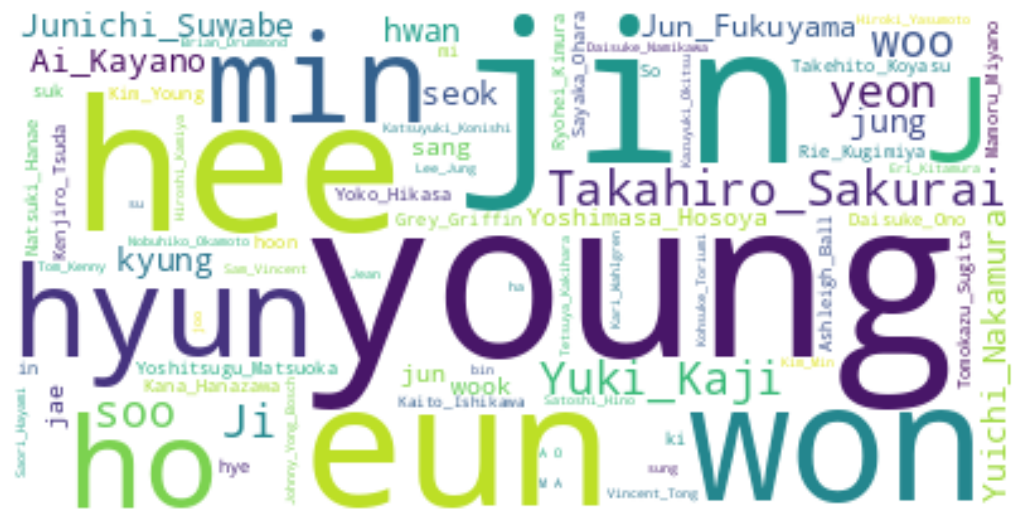

In [111]:
#cloud of the most common TV Show cast members
cast_list=list(netflix_tv['cast'])
tv_actor=[]

for i in cast_list:
    i=list(i.split(','))
    for j in i:
        tv_actor.append(j.strip().replace(' ','_'))
tv_g=Counter(tv_actor)

print(tv_g)


text = str(tv_actor).replace(',','').replace("'","") 
plt.rcParams['figure.figsize'] = (13, 13)

wordcloud = WordCloud(stopwords = ["Unlisted"],collocations = True, max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()